<a href="https://colab.research.google.com/github/takahashi0329/DeepLerarning2022Late/blob/main/MNISTExample2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNISTデータセットを使って手書き数字の画像判定を実装する

## ライブラリをimport

In [1]:
from tensorflow.python.util.tf_export import InvalidSymbolNameError
import keras
# 学習用ライブラリ
#from keras.models import Sequential #学習モデル Sequentialモデル
#from keras.layers.core import Dense, Dropout,Activation# ニューロンの各層
#from tensorflow.keras.optimizers import RMSprop
#from keras.callbacks import EarlyStopping, CSVLogger
#MNISTデータセット読み込む
#from keras.detasets import mnist

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# 学習用ライブラリ
from tensorflow  import keras
# MNISTデータセットを読み込む
from tensorflow.keras.datasets import mnist
#学習モデル Sequentialモデル
from tensorflow.keras.models import Sequential
# ニューロンの各層
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLogger

# 表示用にpyplotを読み込む
%matplotlib inline
import matplotlib.pyplot as plt

### ハイパーパラメータ（人間が決めるパラメータ）の定義

In [3]:
# バッチサイズ（元のデータを何件ごとにまとめて処理するか）
batch_size = 128
# クラス数（結果をいくつに分類するか）
num_classes = 10
# エッポクサイズ（学習の回数：順伝播逆伝播の繰り返し数）
epochs = 20

###MINISTデータセットのデータを読み込む

In [4]:
# MNISTデータセット読み込み
# x_**は画像データ、y_**は答え（その画像が数字の何なのか）
#**_trainは学習用データ、**_testは検証用データ
(x_train, y_train), (x_test, y_test) = mnist. load_data();

11490434/11490434 [==============================] - 0s 0us/step


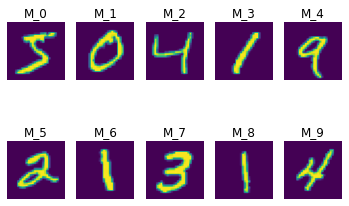

In [5]:
# ループして x_train に入ったMNISTの画像データを試しに表示
for i in range(10):
  # pyplot で表示していく
  plt.subplot(2,5, i+1) #2行5列で、i+1番目の画面をプロットセット
  plt.title("M_%d" % i)#「M_0」のような形式でタイトルを表示
  plt.axis("off")#軸線をオフ
  plt.imshow(x_train[i].reshape(28,28), cmap=None)
#ループ終わり
plt.show()


## データの前処理（画像サイズを正規化）
データを１文字分１行（1レコード）の形にする

In [6]:
# 28*28ピクセルの画面を１行にすると、784ピクセルになる
# 横に784個、0～255までのRGB色数値が並ぶようにする
# x_trainは60,000字（60,000行）分*784列の2次元配列に変換することになる
x_train = x_train.reshape(60000, 784).astype('float32')
# x_testは10,000字（10,000行）分*784列の2次元配列に変換することになる
x_test = x_test.reshape(10000, 784).astype('float32')
# 画像ドットの色情報(RGB 0～255)を0～1の小数値の範囲に変換する
x_train /= 255 #x_trainのひとつひとつを、255で割った値で上書き
x_test /= 255
# 答えデータをnum_classesの数(10)に分類
y_train = keras.utils.to_categorical(y_train, num_classes) #学習用
y_test = keras.utils.to_categorical(y_test, num_classes)# 検証用


###変換したデータの形を表示して確認

In [7]:
# 学習　xデータ

In [8]:
print(x_train.shape) #60,000行(6万文字レコード) 784列
print(x_test.shape) #10,000行(1万文字レコード) 784列
print(y_train.shape) #60,000行(6万文字レコード)、(num_class:0～9の分類)
print(y_test.shape) #10,000行1万文字レコード)、(num_class:0～9の分類)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


## 学習モデルを組み立てる
生成した学習モデルのインスタンスに層を追加していく

In [9]:
# 学習モデルを生成
model = Sequential()

In [10]:
# ニューラル層を作っていく
# 784次元のデータが、任意の数だけ入力され、512次元の形で出力される
model.add(Dense(512, input_shape=(784, ) ) )
# 活性化関数をrelu関数に指定
model.add(Activation('relu'))
# Dropout(データを間引いて過学習を防ぐ)
model.add(Dropout(0.2)) #20%の結果値を0にリセット

###2層目を追加する

In [11]:
# ニューロンの層の追加
model.add(Dense(512)) #512の次元で出力される
# 活性化関数をrelu関数に指定
model.add(Activation('relu'))
# Dropout(データを間引いて過学習を防ぐ)
model.add(Dropout(0.2)) #20%の結果値を0にリセット

###モデルに3層目(最後の層)を追加する

In [12]:
# ニューロンの3層目(出力層)の追加
model.add(Dense(num_classes))#最後は10個(num_classes)に分類
# 最後だけ活性化関数はsoftmaxを指定する
# (複数の出力値の合計が「1.0」( = 100%)になるように値を返してくれるから)
model.add(Activation('softmax'))

### 組み立てた学習モデルの要約(サマリ・概要)を表示

In [13]:
# 学習モデルのサマリ
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

#学習モデルが動く形になるようにコンパイルする

In [14]:
model.compile(
    loss='categorical_crossentrory', #損失の基準(交差エントロビー誤差)
    optimizer=RMSprop(),
    metrics=['accuracy'] #accuracy=精度
)

##学習モデルに学習させる

In [20]:
#コールバック処理の準備
#学習が進んで損失がそれ以上下がらなければ早期終了する
#patience=2は、2回学習分だけ、終了まで様子をみる
es = EarlyStoping(monitor='val_loss',patience=2)
#ログ出力
csv_logger = CSVLogger('training.log')

#学習モデルに学習させる
#(正解データにフィットするように重みを調整する)
hist = model.fit(
    x_train, #学習用画像データ：問題
    y_train, #学習用数値データ：正解
    batch_size = batch_size, #バッチサイズ（batch_size = 20）
    epochs = epochs, #エポック数（学習回数）（epochs = 20）
    verbose = 1, #進行状況を表示
     #validationデータ(チェックデータ)の割合
     #(10%:この分は学習には使わず、学習中の検証チェックに使う)
    validation_split =0.1,
    callbacks=[es, csv_logger] #コンパイルチェック処理
)

NameError: ignored

##学習済みのモデルを使って、学習結果をテスト検証する

In [21]:
#evaluateメソッドで検証する
score = model.evaluate(x_test,y_test,varbose=0) #検証結果を変数に代入
print('test loss:',score[0]) #損失（誤り率）を表示
print('test acc:',score[1]) #精度（正解率）を表示

TypeError: ignored

##学習履歴をグラフ表示する

In [ ]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = len(loss)
plt.plot(range(epochs),loss,marker='.',label='loss(training_data)')
plt.plot(range(epochs),val_loss,marker='.',label='loss(evaluation_data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
#最後に表示
plt.show()